# Crop the DICOM images to 1000 x 700

Load required packages

In [1]:
import pandas as pd
import PySimpleGUI as sg
import matplotlib.pyplot as plt
from keras.models import model_from_json
import numpy as np

Define a function for reading DICOM Images

In [2]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut


def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

Get the filename for saving the files

In [133]:
layout = [  [sg.Text("What is the subject number?")],     
            [sg.Input()],
            [sg.Button('Ok')] ]

window = sg.Window('Subject Number', layout)      
                                                

event, values = window.read()                   

SubNum = values[0]

filenameOutput1 = "Subject"+SubNum+"View1.csv"
filenameOutput2 = "Subject"+SubNum+"View2.csv"
filenameOutput3 = "Subject"+SubNum+"View3.csv"

window.close()                                 

print(SubNum)

312


Ask whether the images are for a left hand or a right hand

In [134]:
layout = [  [sg.Text("Are the images for a left hand or a right hand? (L/R)")],     
            [sg.Input()],
            [sg.Button('Ok')] ]

window = sg.Window('Left or Right', layout)      
                                                

event, values = window.read()                   

Hand01 = values[0]

window.close()                                 


Filenames for DICOM images

In [135]:
filename01 = sg.popup_get_file('Enter the file for the PA View')
filename02 = sg.popup_get_file('Enter the file for the Oblique View')
filename03 = sg.popup_get_file('Enter the file for the Lateral View')

Load and look at the images and determine where to crop the images.

PA View

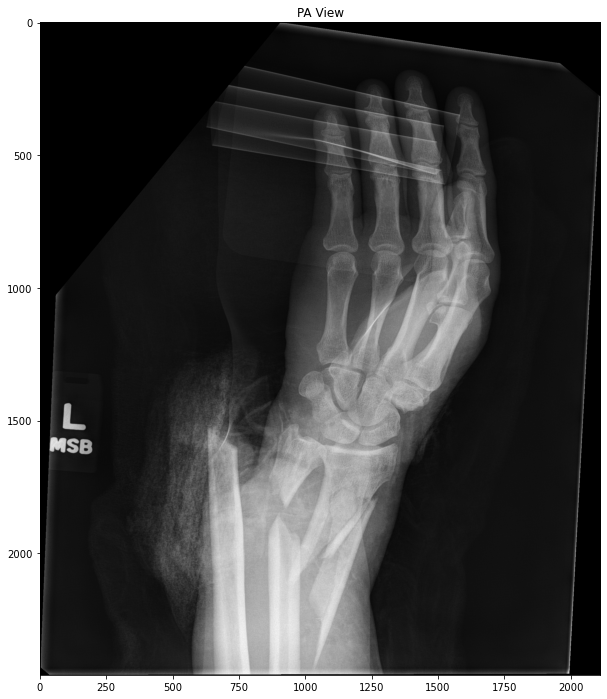

In [138]:
img1 = read_xray(filename01)
plt.figure(figsize = (12,12))
plt.imshow(img1, 'gray')
plt.title("PA View")
plt.savefig('C:/Classifier/PAView.png')

# Determine crop height

layoutPAH =  [   [sg.Text("What is the crop height? 0 start from top, 0.5 centered, 1 start at bottom")],     
                [sg.Input()],                     
                [sg.Button('Ok')],
                [sg.Image('C:/Classifier/PAView.png')] ]

window = sg.Window("Crop Height", layoutPAH)

event, values = window.read()

CHPA = values[0]
CHPA = float(CHPA)

window.close()

# Determine crop width

layoutPAW =  [   [sg.Text("What is the crop width? 0 start from left, 0.5 centered, 1 start at right")],     
                [sg.Input()],                     
                [sg.Button('Ok')],
                [sg.Image('C:/Classifier/PAView.png')] ]

window = sg.Window("Crop Width", layoutPAW)

event, values = window.read()

CWPA = values[0]
CWPA = float(CWPA)

window.close()

# plt.figure(figsize = (12,12))
# plt.show

# Crop images and reverse right hands so that the radius is always on the right of the image

x1 = img1.shape
PAH0 = np.round(CHPA*(x1[0]-1000)).astype(int)
PAW0 = np.round(CWPA*(x1[1]-700)).astype(int)

img1cr = img1[PAH0:PAH0+1000, 
              PAW0:PAW0+700]

if Hand01=="R" or Hand01=="r":
    img1crpd = pd.DataFrame(img1cr)
    img1cr = pd.DataFrame(img1crpd.iloc[:,699])
    for i in range(699):
        img1cr = img1cr.join(pd.DataFrame(img1crpd.iloc[:,698-i]))






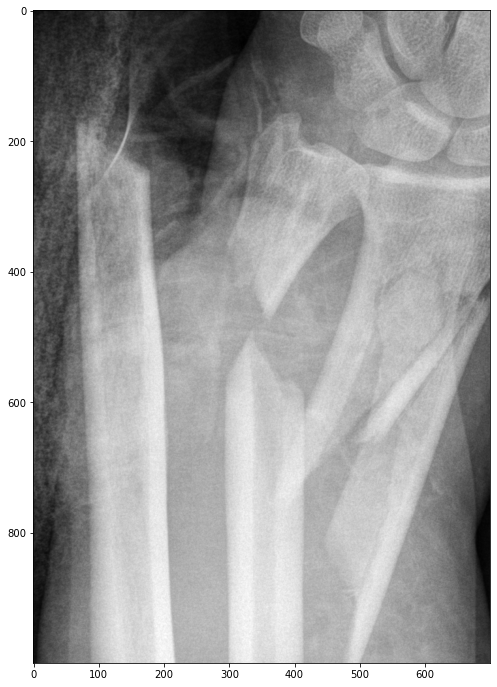

In [139]:
plt.figure(figsize = (12,12))
plt.imshow(img1cr, 'gray')

Oblique View

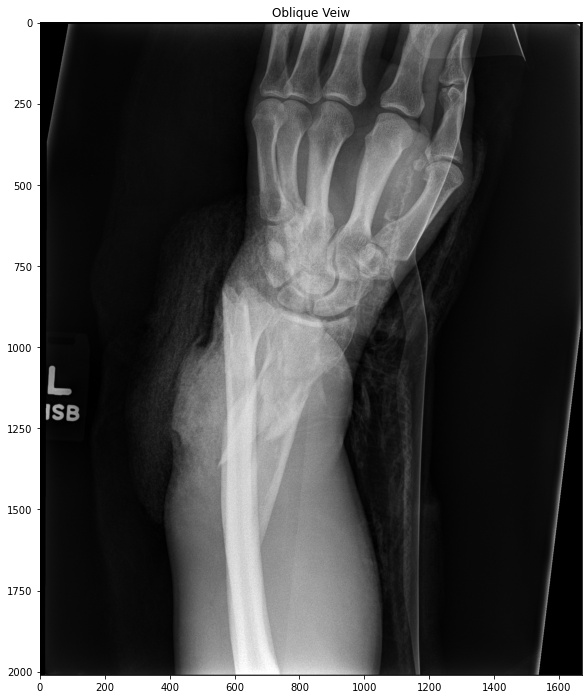

In [140]:
# Determine crop height

img2 = read_xray(filename02)
plt.figure(figsize = (12,12))
plt.imshow(img2, 'gray')
plt.title("Oblique Veiw")
plt.savefig('C:/Classifier/ObView.png')


layoutObH =  [   [sg.Text("What is the crop height? 0 start from top, 0.5 centered, 1 start at bottom")],     
                [sg.Input()],                     
                [sg.Button('Ok')],
                [sg.Image( 'C:/Classifier/ObView.png')] ]
                
window = sg.Window("Crop Height", layoutObH)

event, values = window.read()

CHOb = values[0]
CHOb = float(CHOb)

window.close()

# Determine crop width

layoutObW =  [   [sg.Text("What is the crop width? 0 start from left, 0.5 centered, 1 start at right")],     
                [sg.Input()],                     
                [sg.Button('Ok')],
                [sg.Image( 'C:/Classifier/ObView.png')] ]

window = sg.Window("Crop Width", layoutObW)

event, values = window.read()

CWOb = values[0]
CWOb = float(CWOb)

window.close()

x2 = img2.shape
ObH0 = np.round(CHOb*(x2[0]-1000)).astype(int)
ObW0 = np.round(CWOb*(x2[1]-700)).astype(int)

img2cr = img2[ObH0:ObH0+1000, 
              ObW0:ObW0+700]

if Hand01=="R" or Hand01=="r":
    img2crpd = pd.DataFrame(img2cr)
    img2cr = pd.DataFrame(img2crpd.iloc[:,699])
    for i in range(699):
        img2cr = img2cr.join(pd.DataFrame(img2crpd.iloc[:,698-i]))



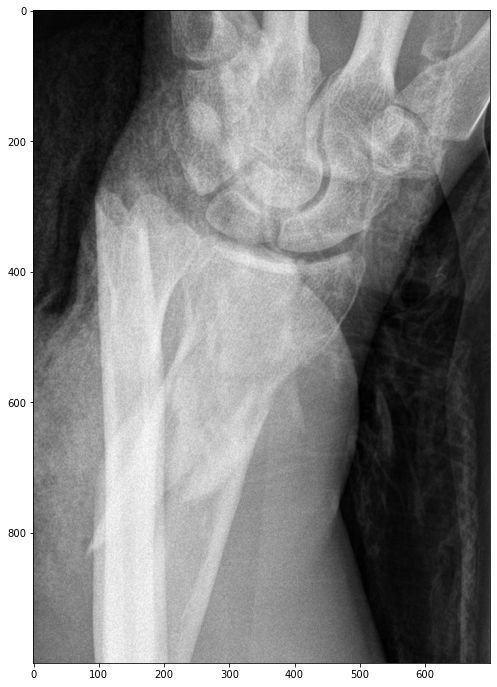

In [141]:
plt.figure(figsize = (12,12))
plt.imshow(img2cr, 'gray')

Lateral View

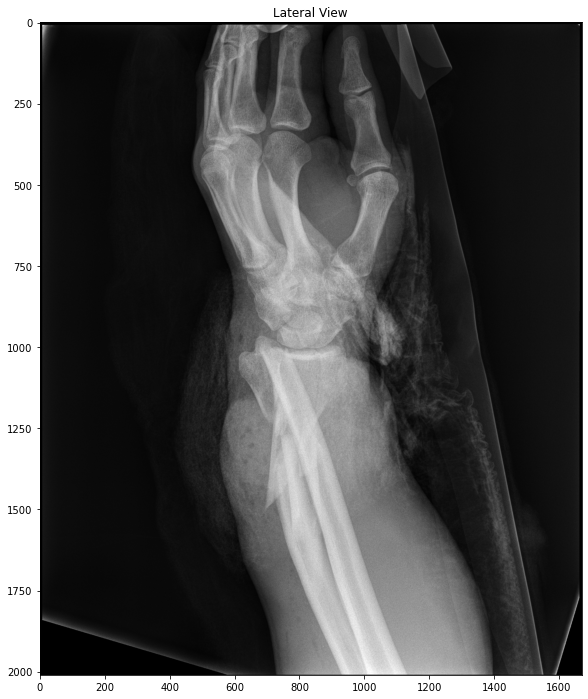

In [142]:
img3 = read_xray(filename03)
plt.figure(figsize = (12,12))
plt.imshow(img3, 'gray')
plt.title("Lateral View")
plt.savefig('C:/Classifier/LView.png')

# Determine crop height

layoutLH =  [   [sg.Text("What is the crop height? 0 start from top, 0.5 centered, 1 start at bottom")],     
                [sg.Input()],                     
                [sg.Button('Ok')],
                [sg.Image( 'C:/Classifier/LView.png')] ]

window = sg.Window("Crop Height", layoutLH)

event, values = window.read()

CHL = values[0]
CHL = float(CHL)

window.close()

# Determine crop width

layoutLW =  [   [sg.Text("What is the crop width? 0 start from left, 0.5 centered, 1 start at right")],     
                [sg.Input()],                     
                [sg.Button('Ok')],
                [sg.Image( 'C:/Classifier/LView.png')] ]

window = sg.Window("Crop Width", layoutLW)

event, values = window.read()

CWL = values[0]
CWL = float(CWL)

window.close()


x3 = img3.shape
LH0 = np.round(CHL*(x3[0]-1000)).astype(int)
LW0 = np.round(CWL*(x3[1]-700)).astype(int)

img3cr = img3[LH0:LH0+1000, 
              LW0:LW0+700]

if Hand01=="R" or Hand01=="r":
    img3crpd = pd.DataFrame(img3cr)
    img3cr = pd.DataFrame(img3crpd.iloc[:,699])
    for i in range(699):
        img3cr = img3cr.join(pd.DataFrame(img3crpd.iloc[:,698-i]))


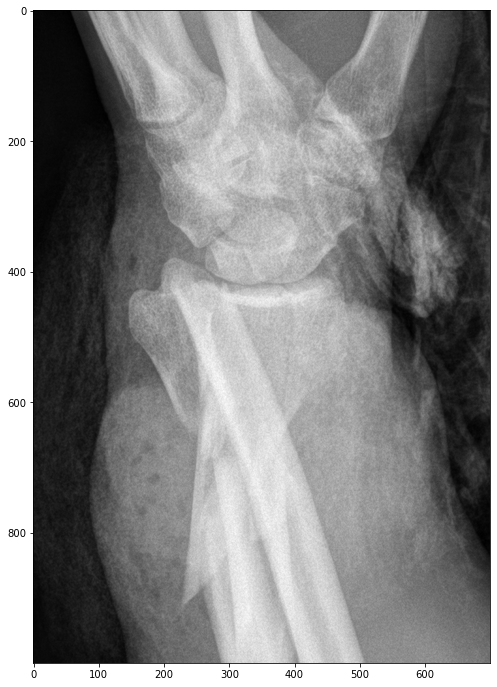

In [143]:
plt.figure(figsize = (12,12))
plt.imshow(img3cr, 'gray')

Save the cropped images.

In [144]:
np.savetxt(filenameOutput1, img1cr, delimiter=",")
np.savetxt(filenameOutput2, img2cr, delimiter=",")
np.savetxt(filenameOutput3, img3cr, delimiter=",")